<a href="https://colab.research.google.com/github/jccc2002/Machine-Learning/blob/main/Perceptron_JCCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Intuition behind a perceptron***

The peceptron is an algorithm capable of classifying two categories by drawing a straight line that separates the data points meaning that, in the end, the ultimate goal is to obtain a decision boundary that can classify new, unseen data points starting with what has been already seen.

The learning of the model starts observations taht will learn as the data comes working as a human brain cell, iteratively adjusting the decisions to minimize classification errors. However, it is important to mention that the perceptron considers each input and a weight deliberately put to make a decision but before doing the prediction that data goes through a function activation where it is contained the bias.

Finally, the algoritm will converge once it is repeated a fixed number of iterations or until all data points are classified. So, once the algorithm has converged, the final decision boundary might be used to classify nwe data points.

  

# ***Pseudocode***

1. Load the Iris dataset.
2. Preprocess the data:
   - Select two out of the three classes for binary classification.
   - Split the dataset into training and testing sets.
   - Define a class with methods for training and prediction.

3. Perceptron Training:
   - Initialize the Perceptron model with a learning rate and iterations.
   - Initialize model weights and bias to zeros as first step.
   - For each iteration in range:
      - For each training sample:
         - Calculate the net input as the dot product of X train and model weights plus bias.
         - Apply the step function to netinput to make a prediction.
         - Update the weights and bias using the learning rule.

4. Perceptron Prediction:
    - For each test sample in X test:
       - Calculate the net inputas the dot product of the sample and model weights plus bias.
       - Apply the step function to net input to make a prediction.
       - Store the prediction in a list.

5. Evaluate the model's performance:
   - Calculate metrics such as accuracy, precision, recall, or F1-score by comparing the predictions to the true labels in test section.


#***Code***

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for i in range(n_samples):
                # Calculate the net input
                net_input = np.dot(X[i], self.weights) + self.bias
                # Apply the step function
                if net_input > 0:
                    prediction = 1
                else:
                    prediction = -1
                # Update the weights and bias
                if y[i] != prediction:
                    update = self.learning_rate * y[i]
                    self.weights += update * X[i]
                    self.bias += update

    def predict(self, X):
        # Calculate the net input
        net_input = np.dot(X, self.weights) + self.bias
        # Apply the step function
        predictions = np.where(net_input > 0, 1, -1)
        return predictions

    def optimization_function(self):
        return "Stochastic Gradient Descent (SGD)"

    def hinge_loss(self, X, y):
        loss = 0
        for i in range(len(X)):
            net_input = np.dot(X[i], self.weights) + self.bias
            loss += max(0, -y[i] * net_input)
        return loss


In [ ]:
# Dataset load
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]
y = np.where(y == 1, -1, 1)


In [ ]:
def traintest(X, y, test_size=0.3, random_seed=None):
    if random_seed:
        np.random.seed(random_seed)

    data = list(zip(X, y))
    np.random.shuffle(data)

    index = int(len(data) * (1 - test_size))
    train_data, test_data = data[:index], data[index:]

    X_train, y_train = zip(*train_data)
    X_test, y_test = zip(*test_data)

    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)


X_train, X_test, y_train, y_test = traintest(X, y, test_size=0.3, random_seed=1)

perceptron = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron.fit(X_train, y_train)

In [ ]:
# Print the Hinge Loss
hinge_loss = perceptron.hinge_loss(X_test, y_test)
print(f"Hinge Loss: {hinge_loss:.2f}")

# Print the optimization function used
optimization_func = perceptron.optimization_function()
print(f"Optimization Function: {optimization_func}")

# Calculate and print the accuracy
predictions = perceptron.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Hinge Loss: 8.34
Optimization Function: Stochastic Gradient Descent (SGD)
Accuracy: 63.33%


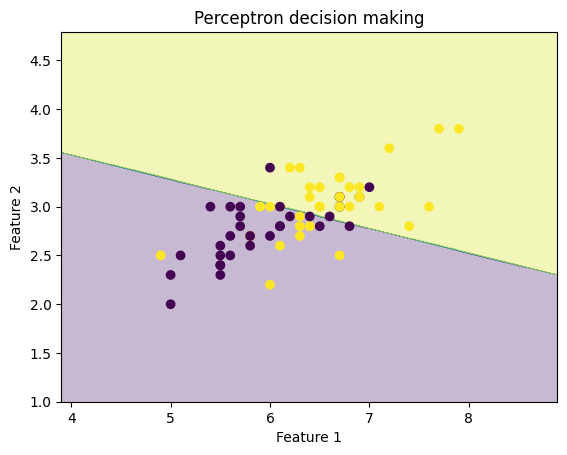

In [ ]:
# Plot the decision boundary
def decision_plot(X, y, perceptron, title):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    Z = perceptron.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

decision_plot(X_train, y_train, perceptron, 'Perceptron decision making')

In [ ]:
%%shell
jupyter nbconvert --to html /content/Perceptron_JCCC.ipynb

[NbConvertApp] Converting notebook /content/Perceptron_JCCC.ipynb to html
[NbConvertApp] Writing 639360 bytes to /content/Perceptron_JCCC.html
